In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [11]:
# directory = './results/mdi_local.real_data_regression/diabetes_regression_parallel/varying_sample_row_n/'
directory = "./results/mdi_local.real_x_sim_y.diabetes-regression.lss-model/diabetes-reg-lss/varying_heritability/"
# directory = './results/mdi_local.real_data_regression/diabetes_regression_new/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
print(folder_names)
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    if "lss-model" in directory and seed == 1:
        continue
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

['seed9', 'seed3', 'seed10', 'seed4', 'seed7', 'seed5', 'seed2', 'seed8', 'seed6', 'seed1']


In [3]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_new_implementation/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile_new/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [12]:
pd.set_option('display.max_columns', None)
combined_df

,rep,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,include_raw,cv_ridge,calc_loo_coef,sample_split,fit_on,model,fi,train_size,test_size,num_features,data_split_seed,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_train_67,sample_train_68,sample_train_69,sample_train_70,sample_train_71,sample_train_72,sample_train_73,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,ablation_seed_0,fi_time,train_AUROC,train_AUPRC,train_F1,test_AUROC,test_AUPRC,test_F1,split_seed,rf_model
0,0,0.1,0.1,100.0,1.0,sqrt,42.0,NaN,NaN,False,oob,test,RF,LFI_with_raw_OOB_RF,296,146,10,9,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119,18,9,58,99,73,97,128,122,3760,35.811752,0.708896,0.838653,0.000000,0.725694,0.836341,0.000000,9,NaN
1,0,0.1,0.1,100.0,1.0,sqrt,42.0,NaN,NaN,NaN,NaN,NaN,RF,LFI_with_raw_RF,296,146,10,9,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119,18,9,58,99,73,97,128,122,3760,60.791198,0.707207,0.831625,0.003861,0.752315,0.850549,0.007937,9,NaN
2,0,0.1,0.1,100.0,1.0,sqrt,42.0,False,0.0,False,inbag,NaN,RF,MDI_RF,296,146,10,9,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119,18,9,58,99,73,97,128,122,3760,26.856047,0.504505,0.696167,0.067407,0.582176,0.753878,0.039683,9,NaN
3,0,0.1,0.1,100.0,1.0,sqrt,42.0,NaN,NaN,NaN,NaN,NaN,RF,TreeSHAP_RF,296,146,10,9,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,1

In [13]:
# Print the run-time of the feature importance algorithm
averages = combined_df.groupby('fi')['fi_time'].mean().reset_index()
print(averages)

                     fi      fi_time
0   Kernel_SHAP_RF_plus   712.338098
1   LFI_with_raw_OOB_RF    37.645961
2       LFI_with_raw_RF    61.391532
3  LFI_with_raw_RF_plus    15.300676
4          LIME_RF_plus  1731.041556
5                MDI_RF    27.809609
6           TreeSHAP_RF     4.174213


In [14]:
#################### Change the following according to the dataset ####################
task = "regression" #"regression" "classification"
########################################################################################
methods_all = combined_df['fi'].drop_duplicates().tolist()
n_testsize = combined_df[['train_size', 'test_size']].drop_duplicates()
num_features = combined_df['num_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [18]:
grouped = combined_df.groupby("model")
for model, group_df in grouped:
    print("Model:", model)
    print("AUROC:", group_df["test_AUROC"].mean())
    print("AUPRC:", group_df["test_AUPRC"].mean())
    print("F1:", group_df["test_F1"].mean())

Model: RF
AUROC: 0.7672566229423867
AUPRC: 0.8654258983686067
F1: 0.015111362188908462
Model: RF_plus
AUROC: 0.788966049382716
AUPRC: 0.8744462679905067
F1: 0.013980746619635494


# Training Data

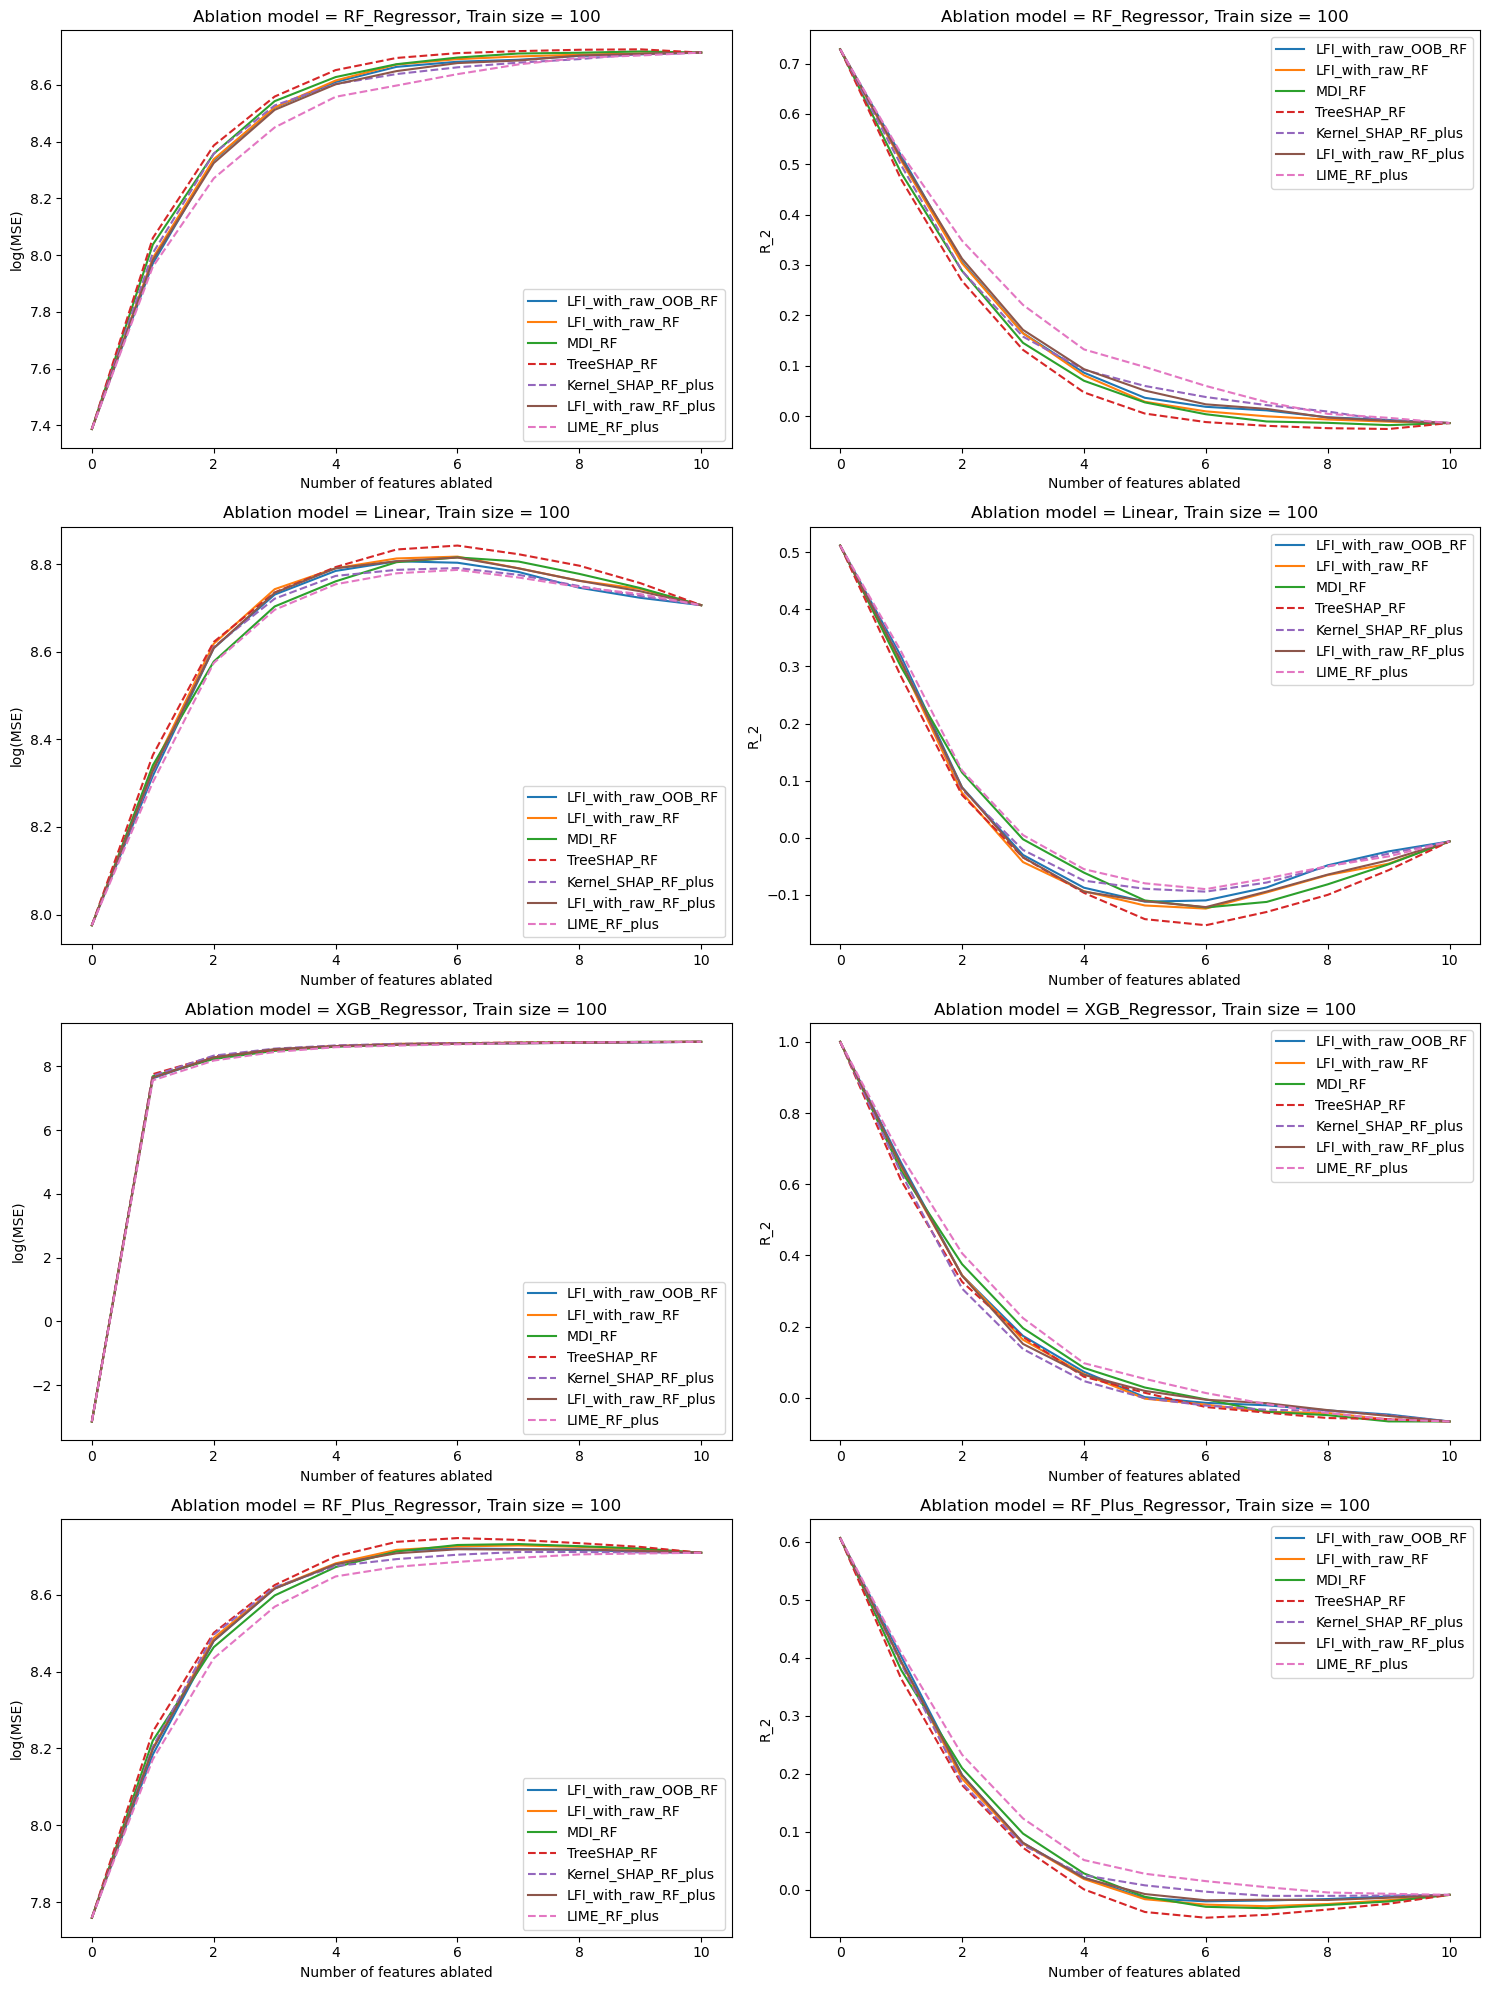

In [8]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        ax.legend()

plt.tight_layout()
plt.savefig("./satellite_image_regression_train.png")
plt.show()

# Test data(subset)

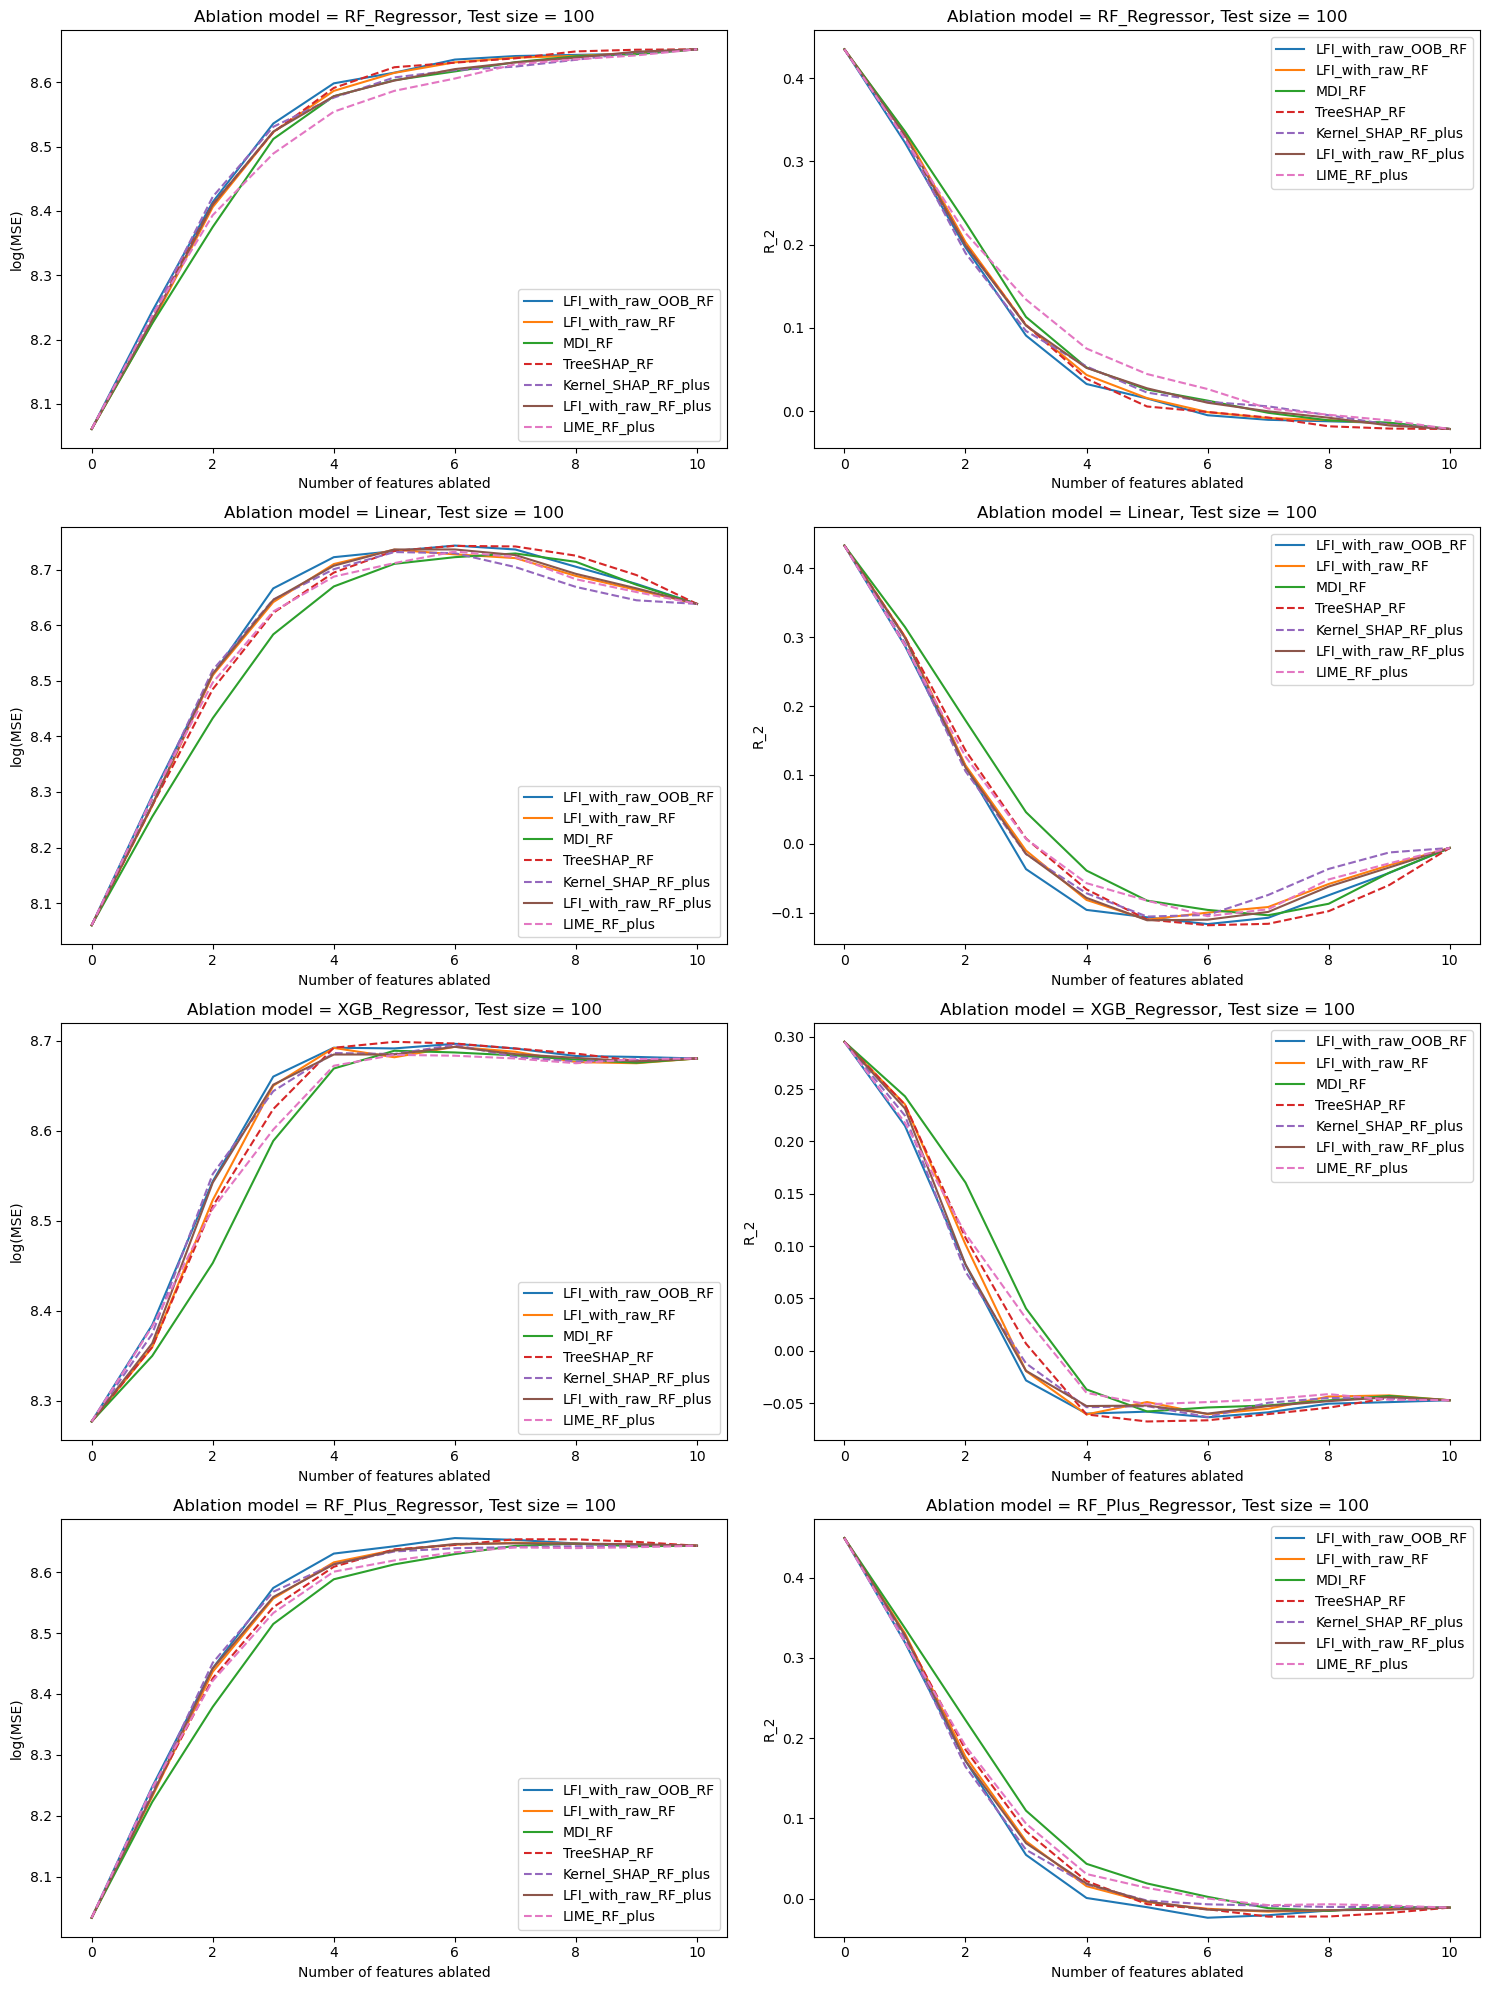

In [9]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        ax.legend()

plt.tight_layout()
plt.savefig("./satellite_image_regression_test_subset_1.png")
plt.show()

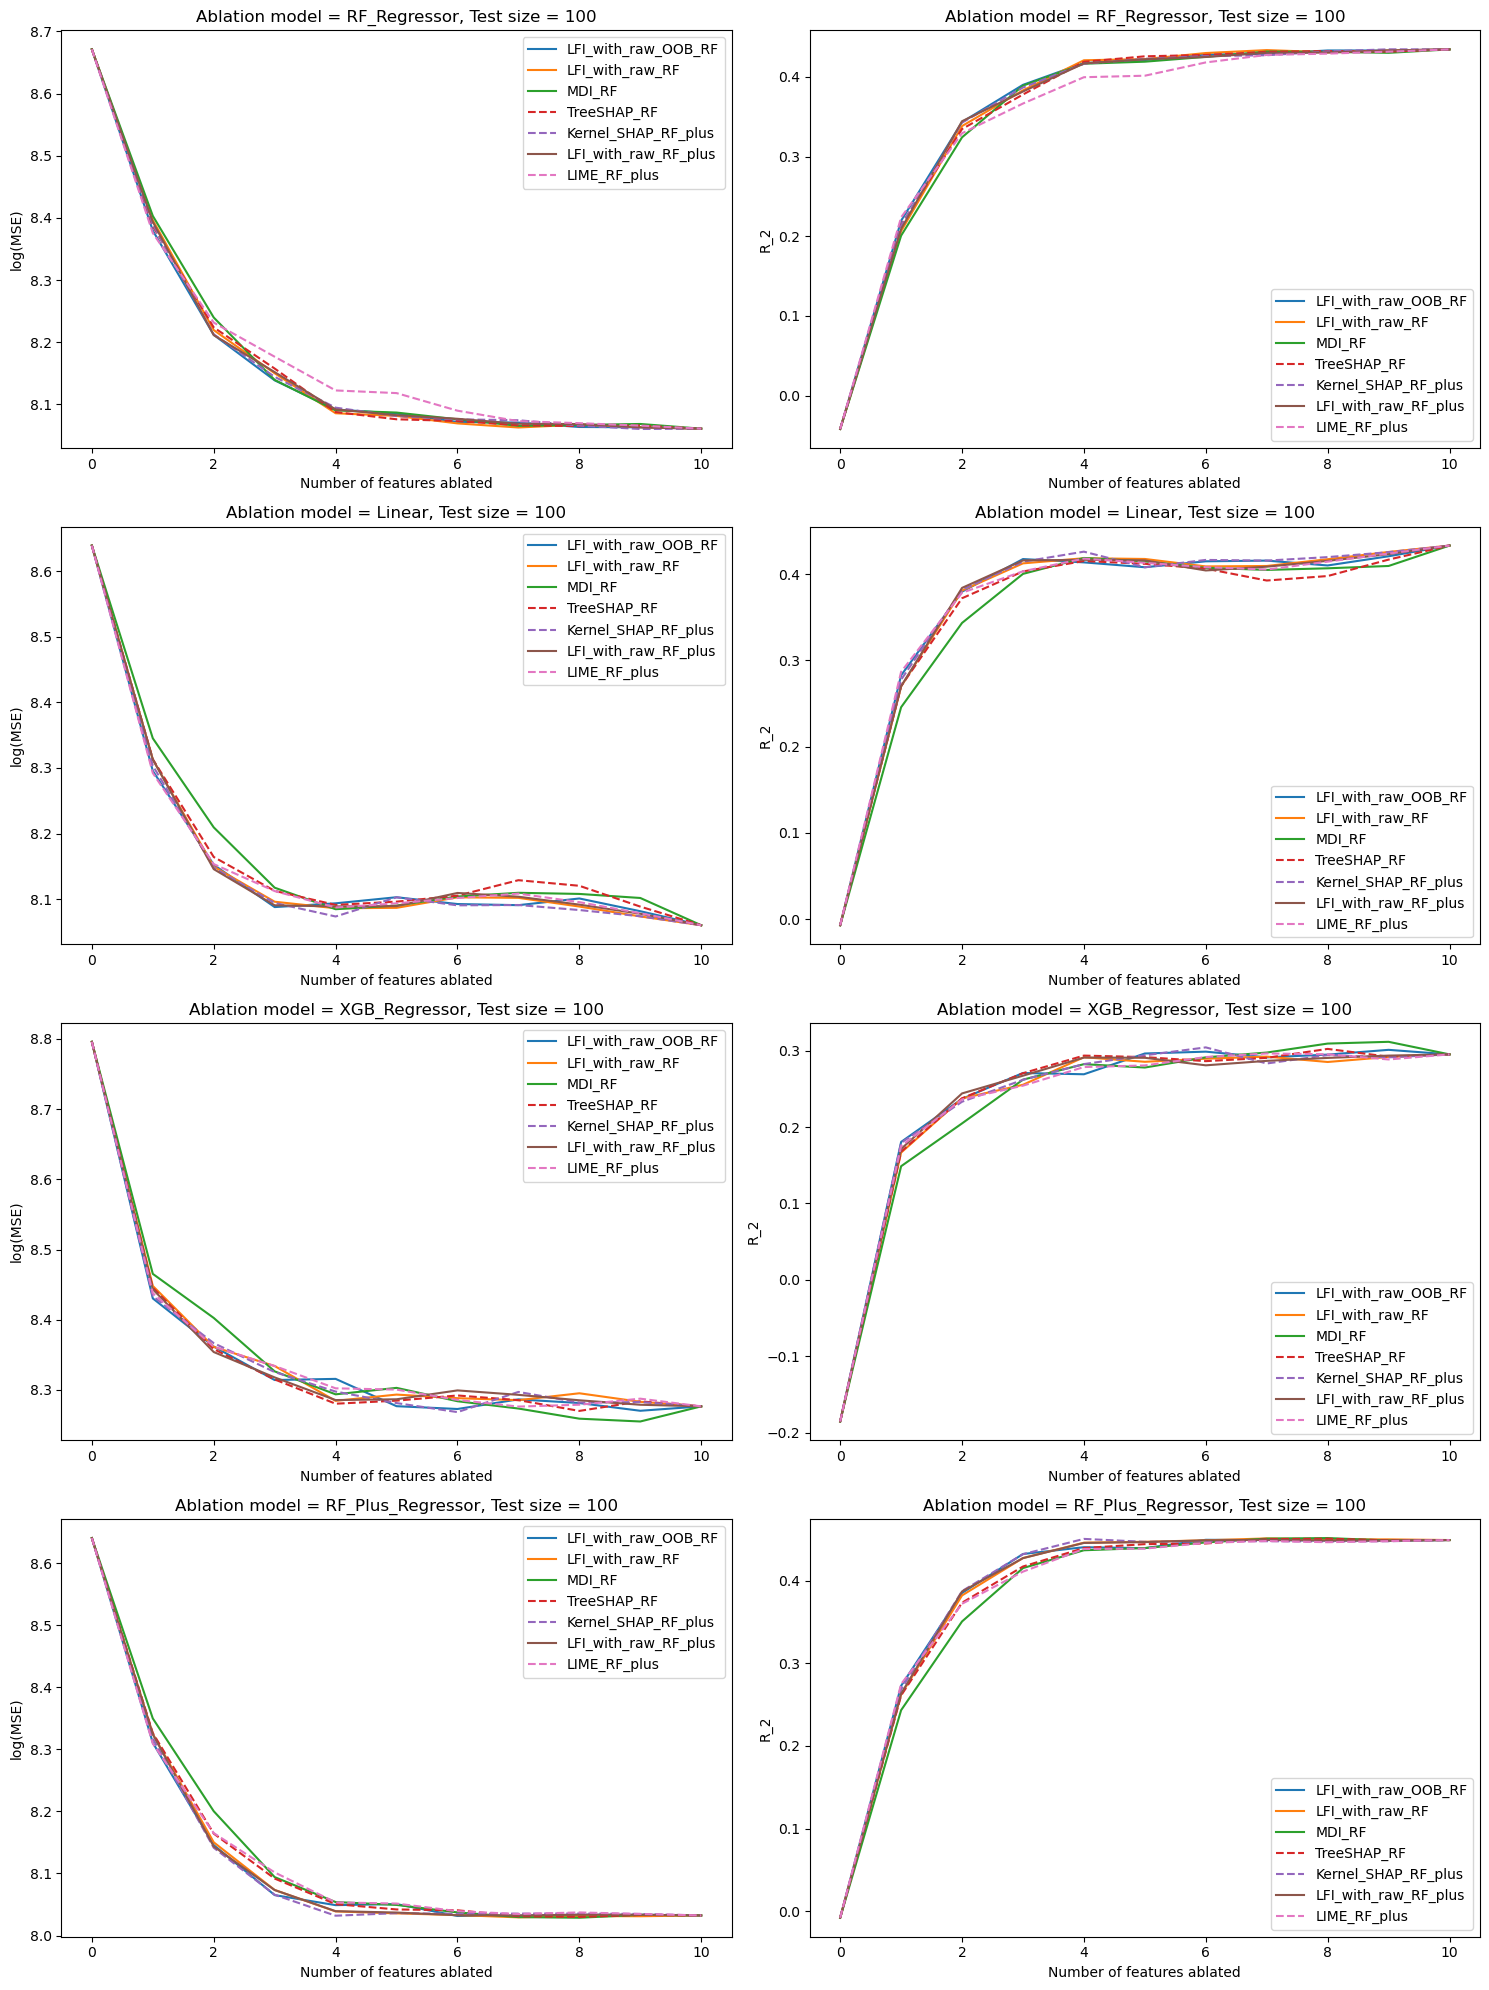

In [10]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_blank"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_blank"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_blank"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_blank"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        ax.legend()
plt.tight_layout()
plt.savefig("./satellite_image_regression_test_subset_2.png")
plt.show()

# Test data

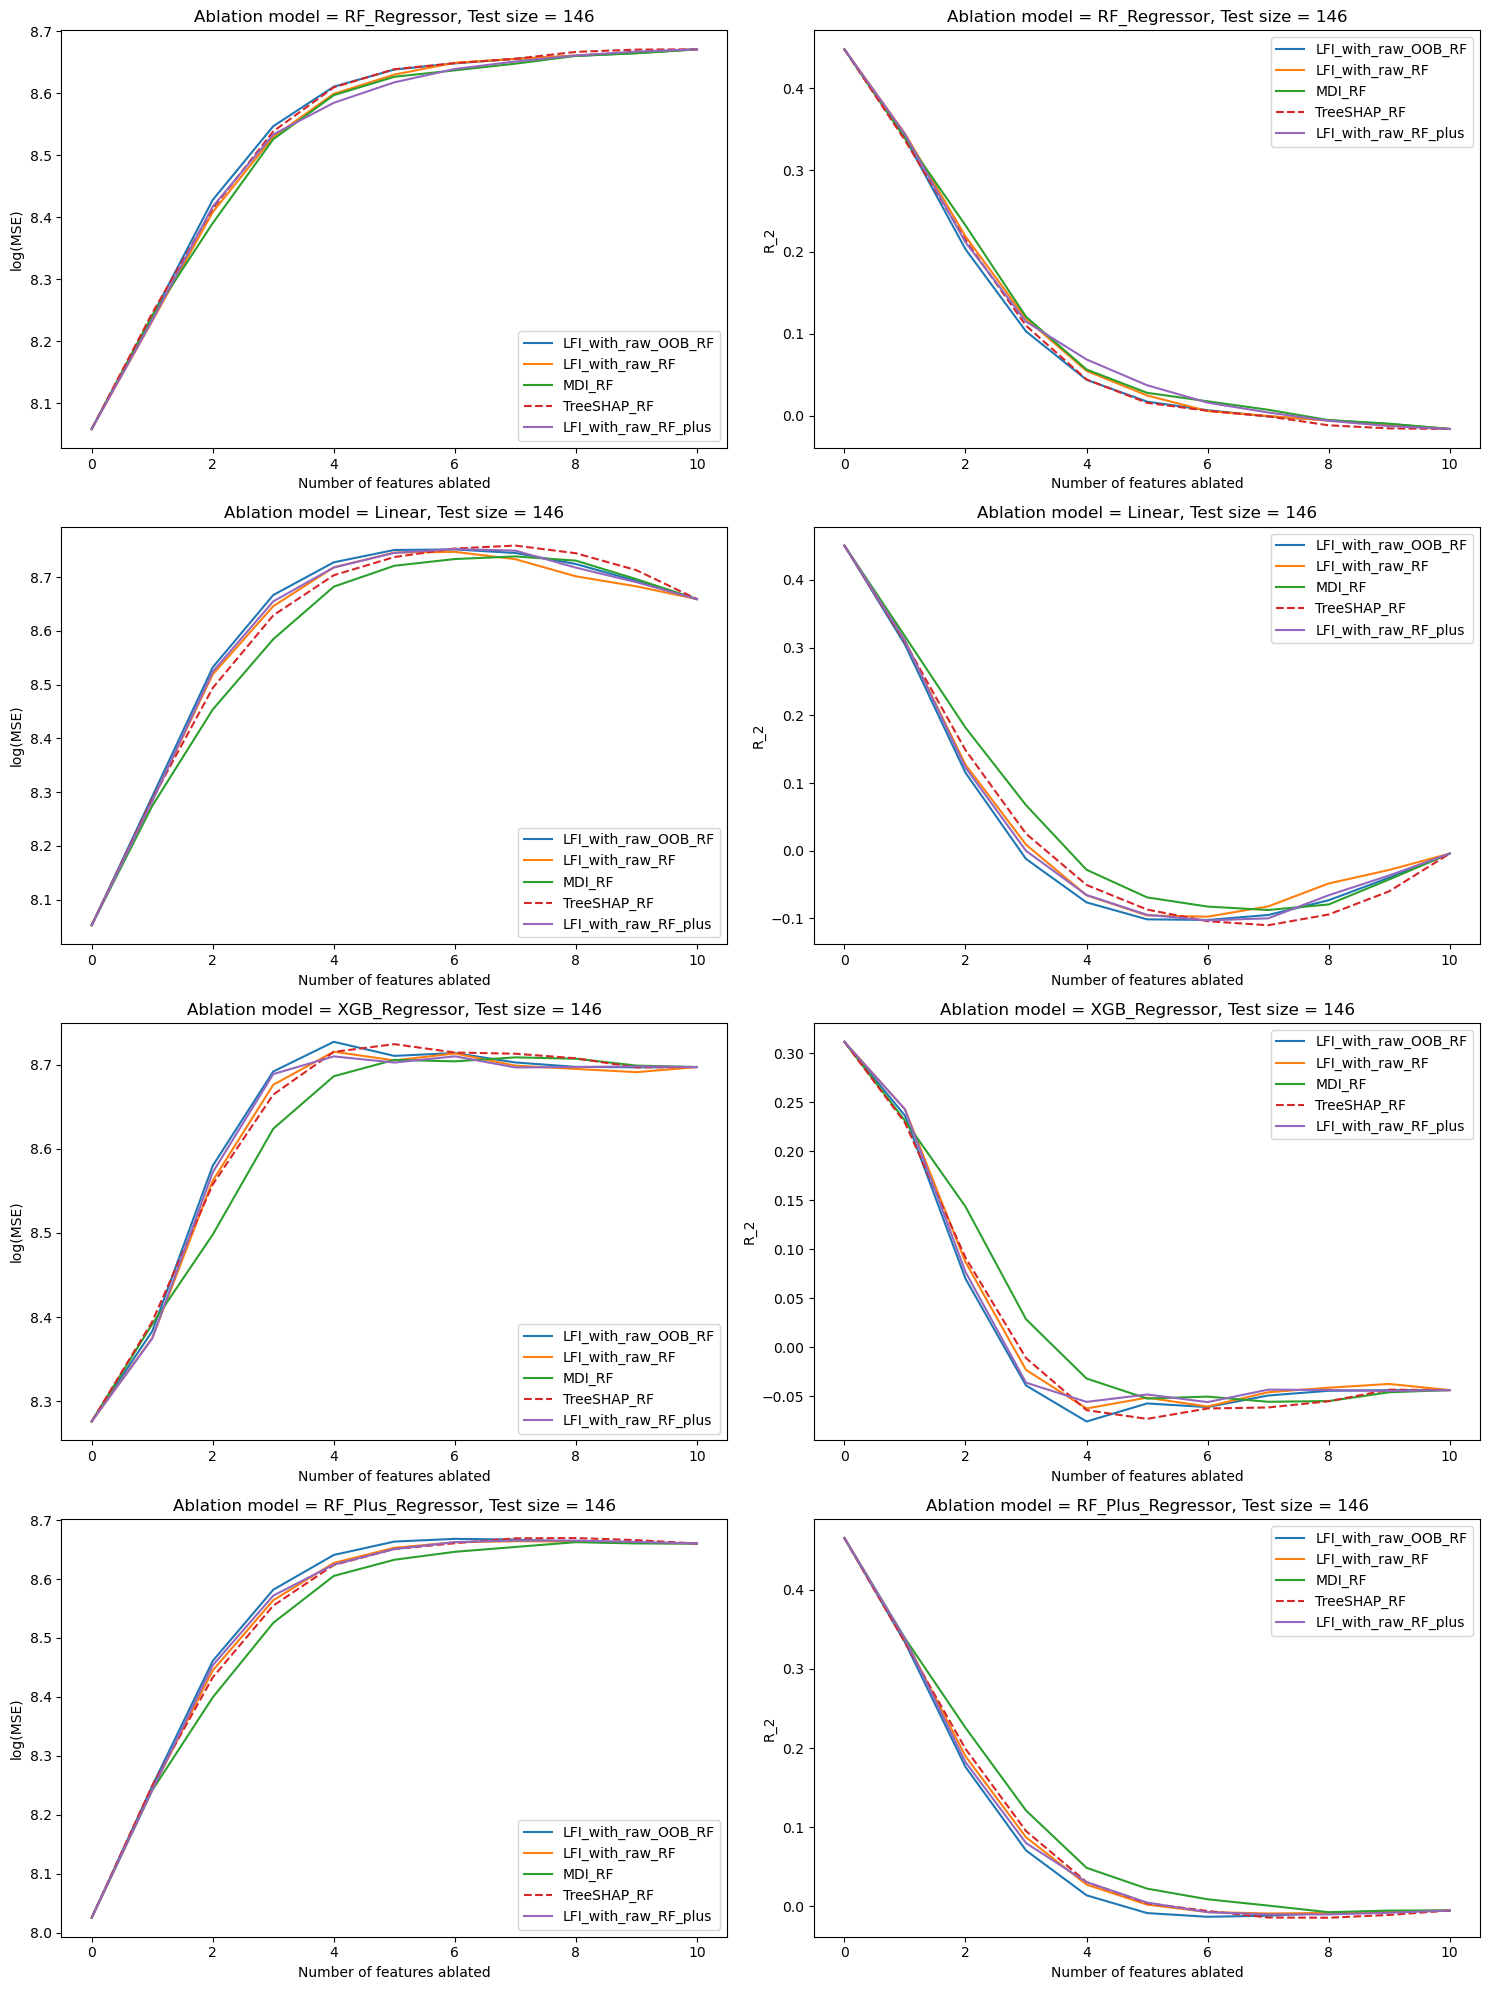

In [11]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m not in ["Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                    ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
                else:
                    ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = {n_testsize["test_size"].values[0]}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {n_testsize["test_size"].values[0]}')
        ax.legend()
plt.tight_layout()
plt.savefig("./satellite_image_regression_test.png")
plt.show()